In [1]:
import numpy as np
import toy

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patheffects as pe
mpl.rc('text', usetex=True)

import seaborn as sns
sns.set_context("notebook");
sns.set(rc={'axes.facecolor':'gainsboro', 'figure.facecolor':'white'})

n = 256
teal_vals = np.ones((n, 4))
teal_vals[:, 0] = np.linspace(0, 1, n)
teal_vals[:, 1] = np.linspace(128 / 256.0, 1, n)
teal_vals[:, 2] = np.linspace(128 / 256.0, 1, n)
teal_cmap = mpl.colors.ListedColormap(teal_vals)

darkorange_vals = np.ones((n, 4))
darkorange_vals[:, 0] = np.linspace(255 / 256.0, 1, n)
darkorange_vals[:, 1] = np.linspace(140 / 256.0, 1, n)
darkorange_vals[:, 2] = np.linspace(0, 1, n)
darkorange_cmap = mpl.colors.ListedColormap(darkorange_vals)

# run illustrative example with and without autofocusing

In [2]:
train_std = 1.6
label_std = 0.04
n = 100

# generate labeled training data
x_nx1, labels_n = toy.get_training_data(n, train_std=train_std, label_std=label_std)

# run CbAS with and without autofocusing
searchmod_txn, _ = toy.iterate_no_af(x_nx1, labels_n, train_std=train_std)
searchmodaf_txn, oracle_txn, oracle_std_t, iw_txn, _ = toy.iterate_af(x_nx1, labels_n, train_std=train_std)

# evaluate model-based design objective (Equation 1 in main paper) achieved by final search model
obj_noaf = toy.evaluate_mbd_objective(searchmod_txn[-1])
obj_af = toy.evaluate_mbd_objective(searchmodaf_txn[-1])
print("MBD objective without AF: {:.3f}.\nMBD objective with AF: {:.3f}.\nImprovement from AF: {:.3f}.".format(
    obj_noaf, obj_af, obj_af - obj_noaf))

MBD objective without AF: 0.445.
MBD objective with AF: 0.714.
Improvement from AF: 0.269.


# plot results in the style of Figure 1

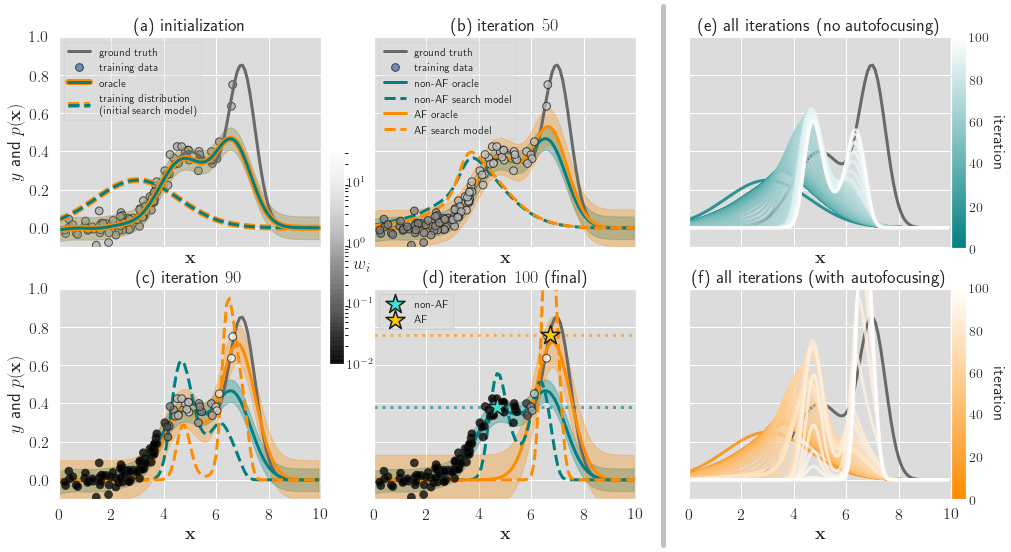

In [5]:
def plot_iteration(row, col, it, legend=True, mark_mode=True):
    axs[row, col].plot(x, gt_x, linewidth=lw, c=gt_c, label="__nolegend__" if mark_mode else "ground truth");
    out = axs[row, col].scatter(x_nx1, labels_n, c=iw_txn[it - 1], cmap="Greys_r",
                                norm=mpl.colors.LogNorm(vmin=1e-2, vmax=30),
                                marker="o", edgecolor="k", zorder=10, alpha=data_alpha, s=s,
                                label="__nolegend__" if mark_mode else "training data");
    axs[row, col].plot(x, oracle_txn[0], c=noaf_c, linewidth=lw,
                       label="__nolegend__" if mark_mode else "non-AF oracle");
    axs[row, col].fill_between(x, oracle_txn[0] - oracle_std_t[0], oracle_txn[0] + oracle_std_t[0],
                               alpha=oracle_alpha, color=noaf_c);
    axs[row, col].plot(x, oracle_txn[it], c=af_c, linewidth=lw, label="__nolegend__" if mark_mode else "AF oracle");
    axs[row, col].fill_between(x, oracle_txn[it] - oracle_std_t[it], oracle_txn[it] + oracle_std_t[it],
                               alpha=oracle_alpha, color=af_c);
    axs[row, col].plot(x, searchmod_txn[it], "--", linewidth=lw, c=noaf_c,
                       label="__nolegend__" if mark_mode else "non-AF search model")
    axs[row, col].plot(x, searchmodaf_txn[it], "--", linewidth=lw, c=af_c,
                       label="__nolegend__" if mark_mode else "AF search model")
    if mark_mode:
        sm_argmax = np.argmax(searchmod_txn[it])
        smaf_argmax = np.argmax(searchmodaf_txn[it])
        axs[row, col].axhline(gt_x[sm_argmax], linestyle=":", linewidth=lw, c=noaf_c, alpha=smmax_alpha)
        axs[row, col].axhline(gt_x[smaf_argmax], linestyle=":", linewidth=lw, c=af_c, alpha=smmax_alpha)
        axs[row, col].scatter(x[sm_argmax], gt_x[sm_argmax],
                              marker="*", zorder=11, s=400, edgecolor="k", c=noaf_star_c, linewidth=1.5, label="non-AF")
        axs[row, col].scatter(x[smaf_argmax], gt_x[smaf_argmax],
                              marker="*", zorder=11, s=400, edgecolor="k", c=af_star_c, linewidth=1.5, label="AF")
        axs[row, col].legend();
    if legend:
        handles, labels = axs[row, col].get_legend_handles_labels()
        idx = [0, 5, 1, 3, 2, 4]
        axs[row, col].legend([handles[i] for i in idx], [labels[i] for i in idx], fancybox=True, framealpha=0.4);
    return out


# === plotting parameters ===

its = [50, 90, 100]
x = toy.DEFAULT_X
gt_x = toy.GT_X
cbar_h = 0.345
cbar_w = 0.0125
gt_c = "dimgray"
noaf_c = "teal"
af_c = "darkorange"
noaf_star_c = "turquoise"
af_star_c = [[255 / 256.0, 200 / 256.0, 0]]
plot_sm_every = 2
lw = 3
sm_lw = 3
data_alpha = 0.75
sm_alpha = 0.8
smmax_alpha = 0.6
oracle_alpha = 0.3
s = 60
ticksize = 16
fontsize = 18


# === plotting ===

fig, axs = plt.subplots(2, 3, figsize=(16, 8.5), sharex=True, sharey=True);
for ax in axs.flatten():
    ax.tick_params(axis='both', which='major', labelsize=ticksize)
axs[0, 0].set_title("(a) initialization", fontsize=fontsize);
axs[0, 1].set_title("(b) iteration ${}$".format(its[0]), fontsize=fontsize);
axs[1, 0].set_title("(c) iteration ${}$".format(its[1]), fontsize=fontsize);
axs[1, 1].set_title("(d) iteration ${}$ (final)".format(its[2]), fontsize=fontsize);
axs[0, 2].set_title("(e) all iterations (no autofocusing)", fontsize=fontsize);
axs[1, 2].set_title("(f) all iterations (with autofocusing)", fontsize=fontsize);
axs[0, 0].set_ylim([-0.1, 1.]); axs[0, 0].set_xlim([0, 10]);
axs[0, 0].set_ylabel("$y$ and $p(\mathbf{x})$", fontsize=fontsize);
axs[1, 0].set_ylabel("$y$ and $p(\mathbf{x})$", fontsize=fontsize);
for row in axs:
    for ax in row:
        ax.set_xlabel(r'$\mathbf{x}$', fontsize=fontsize)

# ----- subplot (0, 0) -----
axs[0, 0].plot(x, gt_x, linewidth=lw, c=gt_c, label="ground truth");
axs[0, 0].scatter(x_nx1, labels_n, c=np.ones((labels_n.size)), cmap="Greys_r", marker="o", edgecolor="k",
                  norm=mpl.colors.LogNorm(vmin=1e-2, vmax=30), alpha=data_alpha, s=s, label="training data");
axs[0, 0].plot(x, searchmod_txn[0], "--", linewidth=lw, c=noaf_c,
               label="training distribution\n(initial search model)",
               path_effects=[pe.Stroke(linewidth=2 * lw, foreground=af_c), pe.Normal()]);
axs[0, 0].plot(x, oracle_txn[0], c=noaf_c, linewidth=lw, label="oracle",
               path_effects=[pe.Stroke(linewidth=2 * lw, foreground=af_c), pe.Normal()]);
axs[0, 0].fill_between(x, oracle_txn[0] - oracle_std_t[0], oracle_txn[0] + oracle_std_t[0],
                       color=noaf_c, alpha=0.6 * oracle_alpha)
axs[0, 0].fill_between(x, oracle_txn[0] - oracle_std_t[0], oracle_txn[0] + oracle_std_t[0],
                       color=af_c, alpha=0.6 * oracle_alpha)
axs[0, 0].legend();
handles, labels = axs[0, 0].get_legend_handles_labels()
idx = [0, 3, 2, 1]
axs[0, 0].legend([handles[i] for i in idx], [labels[i] for i in idx], fancybox=True, framealpha=0.4);


# ----- subplots (0, 1), (0, 2), (1, 0) -----
out1 = plot_iteration(0, 1, its[0], mark_mode=False)
out2 = plot_iteration(1, 0, its[1], legend=False, mark_mode=False)
out3 = plot_iteration(1, 1, its[2], legend=False)
cax = fig.add_axes([0.36, 0.345, cbar_w, cbar_h])
cb = fig.colorbar(out1, cax=cax, orientation='vertical')
cb.ax.tick_params(size=0, labelsize=14)
cb.ax.set_ylabel(r'$w_i$', fontsize=18, rotation=0, labelpad=-12)


# ----- subplot (0, 2) -----
axs[0, 2].plot(x, gt_x, linewidth=lw, c=gt_c, label="ground truth");
n_it = toy.DEFAULT_THRESHOLDS.size + 1
for i, searchmod_n in enumerate(searchmod_txn):
    if i % plot_sm_every == 0:
        rgba = teal_cmap(float(i) / n_it)
        axs[0, 2].plot(x, searchmod_n, c=rgba, linewidth=sm_lw, alpha=sm_alpha);
cax = fig.add_axes([0.9, 0.535, cbar_w, cbar_h])
norm = mpl.colors.Normalize(vmin=0, vmax=100, clip=False)
cb = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=teal_cmap), cax=cax, orientation='vertical')
cb.ax.set_ylabel("iteration", fontsize=16, rotation=270, labelpad=15)
cb.set_ticks(np.arange(0, 101, 20));
cb.ax.tick_params(size=0, labelsize=14)

    
# ----- subplot (1, 2) -----
axs[1, 2].plot(x, gt_x, linewidth=lw, c=gt_c, label="ground truth");
for i, searchmodaf_n, oracle_n, std in zip(range(n_it), searchmodaf_txn, oracle_txn, oracle_std_t):
    if i % plot_sm_every == 0:
        rgba = darkorange_cmap(float(i) / n_it)
        axs[1, 2].plot(x, searchmodaf_n, c=rgba, linewidth=sm_lw, alpha=sm_alpha);
cax = fig.add_axes([0.9, 0.125, cbar_w, cbar_h])
norm = mpl.colors.Normalize(vmin=0, vmax=100, clip=False)
cb = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=darkorange_cmap), cax=cax, orientation='vertical')
cb.ax.set_ylabel("iteration", fontsize=16, rotation=270, labelpad=15)
cb.set_ticks(np.arange(0, 101, 20));
cb.ax.tick_params(size=0, labelsize=14)
line = plt.Line2D([0.65, 0.65], [0.05, 0.93], transform=fig.transFigure, color="silver",
                  linewidth=5, solid_capstyle="round");
fig.add_artist(line);